# TinyTransformer: Train and Evaluate
Set your arguments below and run the desired cell.
- Train cell: trains the model and automatically evaluates on test pairs using solutions.json.
- Eval-only cell: loads a checkpoint and evaluates on test pairs.
- Optional single-example inference cell at the end.

In [ ]:
# %cd /content/mdlARC/
from pathlib import Path
import argparse
import importlib
import utils, train

# Reload order matters: utils first, then train (train imports utils)
importlib.reload(utils)
importlib.reload(train)  # pick up code changes during iteration

# Editable arguments
args = {
    "data_path": Path("assets/script-tests/grouped-tasks-00d62c1b/challenges.json"),
    "batch_size": 6,
    "epochs": 500,
    "lr": 3e-4,
    "weight_decay": 0.01,
    "grad_clip": 1.0,
    "max_steps": 0,  # 0 disables
    "num_workers": 0,
    "device": "cuda",  # 'cuda' | 'mps' | 'cpu'
    "seed": 42,
    "save_path": Path("runs/tiny.pt"),
    "checkpoint_path": Path(
        "runs/tiny.pt"
    ),  # None or Path('runs/tiny.pt') to load. otherwise use None
    "eval_only": True,
    "inference_task_id": "00d62c1b",  # "3aa6fb7a",  "00d62c1b", "e0fb7511" '00576224' to run single inference
    "inference_pair_index": 0,
    "max_new_tokens": 1024,
    # Visibility toggles
    "log_train_strings": False,
    "log_train_limit": 10,
    "log_inference_prompt": True,
    "log_eval_strings": True,
    "log_eval_limit": 10,
    "plot_inference_grids": True,
}


def make_namespace(d):
    # Ensure Path types for known path-like keys
    for k in ["data_path", "save_path", "checkpoint_path"]:
        if d.get(k) is not None and not isinstance(d[k], Path):
            d[k] = Path(d[k])
    return argparse.Namespace(**d)


In [3]:
# Train + Auto-Eval
cfg = dict(args)
cfg["eval_only"] = False
ns = make_namespace(cfg)
train.run(ns)


Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
step=10 avg_loss=0.0866
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
step=20 avg_loss=0.0658
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30
step=30 avg_loss=0.0440
Saved checkpoint to runs/tiny.pt

[eval prompt] task=00d62c1b pair=0
str: <start> 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 <next_line> 0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 3 3 3 3 3

In [15]:
# Eval-only across test pairs (requires a checkpoint or weights already in memory)
cfg = dict(args)
cfg["eval_only"] = True
# Optionally set a checkpoint to load
# cfg['checkpoint_path'] = Path('runs/tiny.pt')
ns = make_namespace(cfg)
train.run(ns)



[eval prompt] task=00d62c1b pair=0
str: <start> 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 <next_line> 0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 3 3 0 3 0 0 0 3 3 3 3 3 0 0 <next_line> 0 0 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 <next_line> 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 3 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 3


Inference prompt (string): <start> 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 <next_line> 0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 0 3 0 0 <next_line> 0 0 0 0 0 0 3 3 0 3 0 0 0 3 3 3 3 3 0 0 <next_line> 0 0 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 <next_line> 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 <next_line> 0 0 3 0 3 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 <next_line> 0 0 0 0 0 0 0 3 3 3 3 3 0 0 

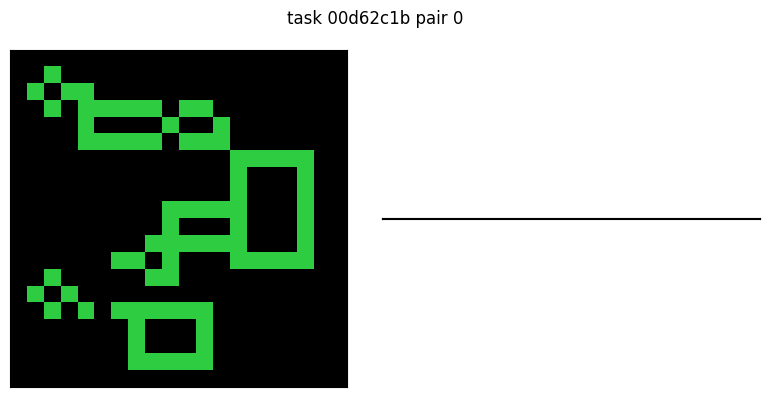

In [4]:
# Optional: Single-example inference by task id and pair index
# Set args['inference_task_id'] above (e.g., '00576224'), then run this cell.
cfg = dict(args)
cfg["eval_only"] = True
assert cfg["inference_task_id"] is not None, "Set inference_task_id in args first."
ns = make_namespace(cfg)
train.run(ns)
